# Description:

This is a guide to data visualization in Python, illustrated by an example. We will also use the same example in R (in a separate R markdown file) in order to compare the data visualization between Python ('Matplotlib.pyplot' & 'Seaborn') and R ('ggplot2'). This example will clearly demonstrate how to visualize data using Python and R and the differences between them. <br>
This 'Python part' file contains two parts: 'Matplotlib.pyplot' and 'Seaborn'. In each of them, we will use some basic techniques to explore our data set. <br>
In section 1.4, we will use matplotlib to plot five classic graphs. A separate file ('ggplot2 part') will contain the same five graphs plotted by ggplot2. We use the same data set and the same types of graphs to clearly show the code and output differences between Python and R.

# Data Set

In [1]:
# Download data from https://datahub.io/machine-learning/iris#data 
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/weixingyu/Downloads/iris.csv")
print(df.head())
print("The data size is",df.shape)


   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
The data size is (150, 5)


# 1. Matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Plot

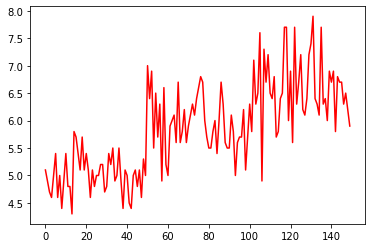

In [3]:
plt.plot(df.index, df["sepallength"], "r-")

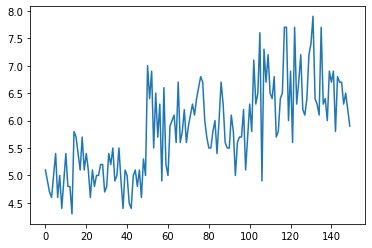

In [4]:
# use ';' to make the output clearer
plt.plot(df.index, df["sepallength"]);

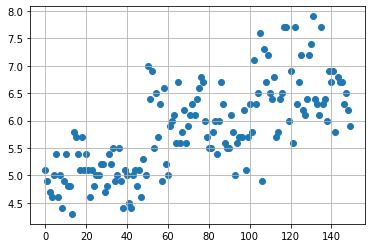

In [5]:
plt.scatter(df.index, df["sepallength"]);
plt.grid(True); # place the grid

## 1.2 Set axes

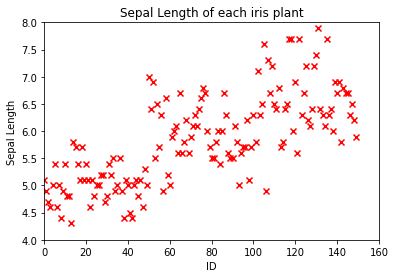

In [6]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(x=df.index,
           y=df["sepallength"],
           marker='x',
           color='red'
          )

ax.set_xlabel('ID')
ax.set_ylabel('Sepal Length')

ax.set_xlim([0,160])
ax.set_ylim([4,8])

ax.set_title('Sepal Length of each iris plant');

## 1.3 Subplots

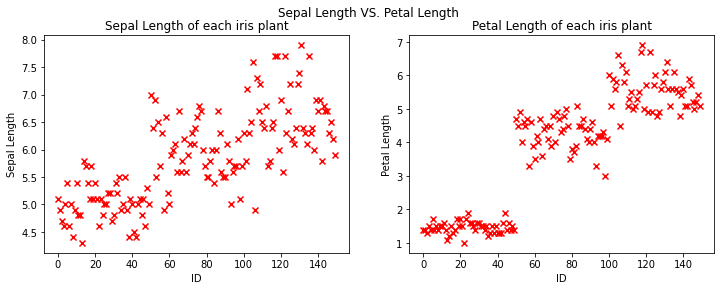

In [7]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter(df.index,df["sepallength"],marker='x',color='red');
ax[1].scatter(df.index,df["petallength"],marker='x',color='red');

ax[0].set_xlabel('ID')
ax[1].set_xlabel('ID')

ax[0].set_ylabel('Sepal Length'), ax[1].set_ylabel('Petal Length')

ax[0].set_title('Sepal Length of each iris plant')
ax[1].set_title('Petal Length of each iris plant')

fig.suptitle('Sepal Length VS. Petal Length');

## 1.4 Comparison of the same graphs using ggplot2

1. Heatmap <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html#matplotlib.pyplot.matshow

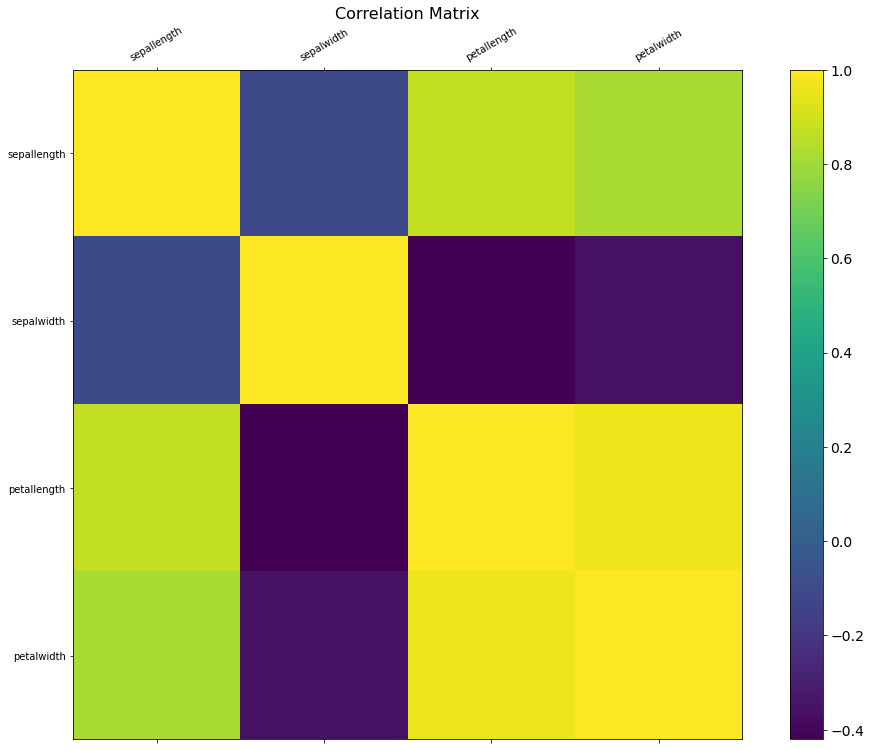

In [8]:
f = plt.figure(figsize=(17, 12))
plt.matshow(df.corr(), fignum=f.number,cmap ='viridis')
plt.xticks(range(4),df.columns[0:4], rotation=30) 
plt.yticks(range(4),df.columns[0:4]) 
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

2. Scatterpot including 3 variables <br>
use color and size of each scatter point to represent other two variables

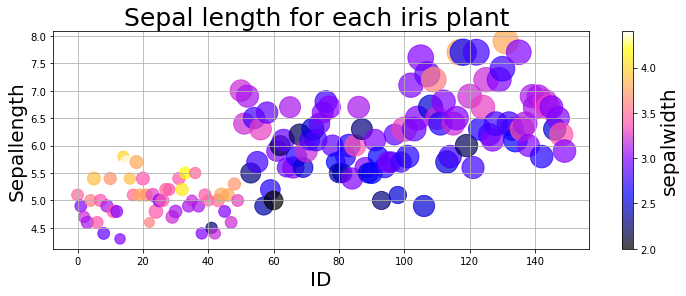

In [9]:
plt.figure(figsize=(12,4))
# Use color representing 'sepalwidth' and size representing 'petallength
plt.scatter(df.index, df["sepallength"],c=df['sepalwidth'] , s=df['petallength']*100,\
            alpha=0.7,cmap = 'gnuplot2')
plt.title('Sepal length for each iris plant ',fontsize=25)
plt.xlabel('ID', fontsize=20)
plt.ylabel('Sepallength', fontsize=20)
plt.grid(True)
cb= plt.colorbar()
cb.set_label('sepalwidth', fontsize=20)

3. Regression graph with multiple regression lines

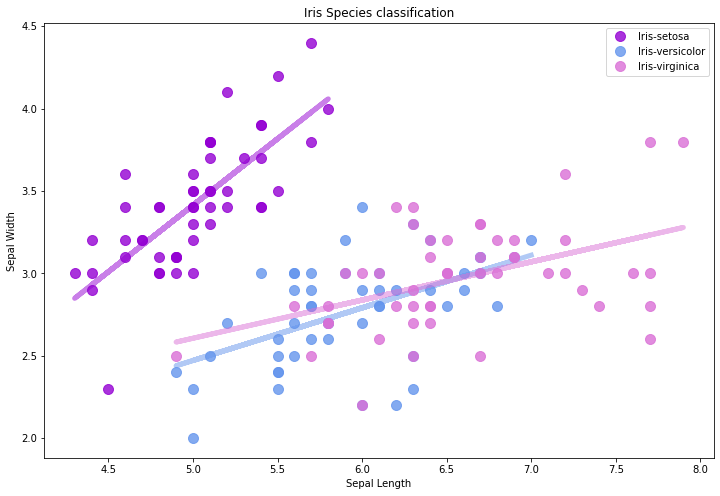

In [10]:
groups = df.groupby("class")
plt.figure(figsize=(12,8))
colors = {'Iris-setosa':'darkviolet', 'Iris-versicolor':'cornflowerblue', \
          'Iris-virginica':'orchid'}
for name, group in groups:
    plt.plot(group["sepallength"], group["sepalwidth"], marker="o", linestyle="", 
    label=name, ms=10, color=colors[name], alpha=.8)
    m, b = np.polyfit(group["sepallength"], group["sepalwidth"], 1)
    plt.plot(group["sepallength"], m*group["sepallength"]+b, linewidth=5, 
    color=colors[name], alpha=.5);
    
plt.legend()
plt.title('Iris Species classification')
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');

4. Multiple plots sharing axes

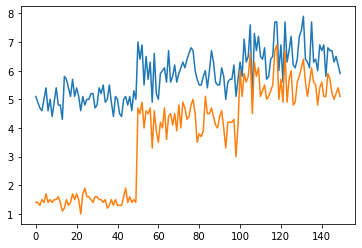

In [11]:
plt.plot(df.index, df["sepallength"],df.index, df["petallength"]);

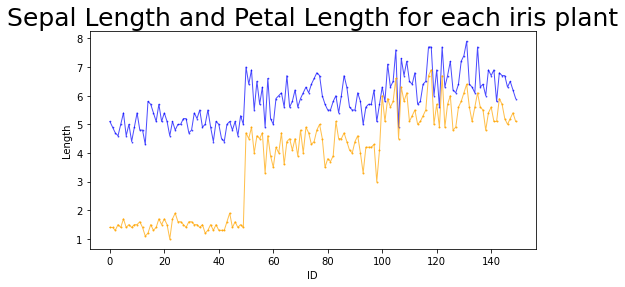

In [12]:
plt.figure(figsize=(8,4))
plt.plot( df.index, df["sepallength"], marker='^',alpha=.7, markersize=1,\
         color='blue', linewidth=1)
plt.plot( df.index, df["petallength"], marker='D',alpha=.7, markersize=1, \
         color='orange', linewidth=1)
plt.xlabel('ID', fontsize=10)
plt.ylabel('Length', fontsize=10)
plt.title('Sepal Length and Petal Length for each iris plant', fontsize=25);


5. Boxplot <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots

In [13]:
s1 = df[df['class']=='Iris-setosa']['sepallength']
s2 = df[df['class']=='Iris-versicolor']['sepallength']
s3 = df[df['class']=='Iris-virginica']['sepallength']
p1 = df[df['class']=='Iris-setosa']['petallength']
p2 = df[df['class']=='Iris-versicolor']['petallength']
p3 = df[df['class']=='Iris-virginica']['petallength']
data_a = [s1,s2,s3]
data_b= [p1,p2,p3]


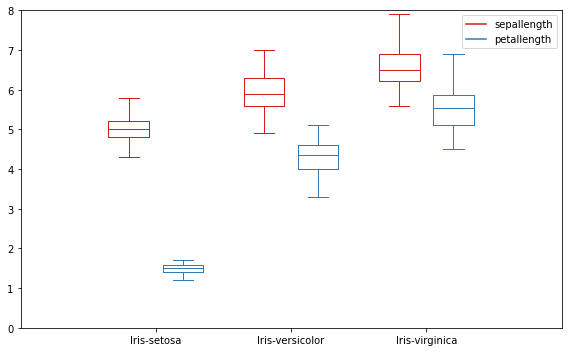

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
ticks = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='sepallength')
plt.plot([], c='#2C7BB6', label='petallength')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

# 2. Seaborn

In [15]:
import seaborn as sns

## 2.1 Plot

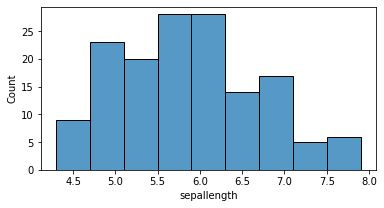

In [16]:
# Histogram
fig,ax = plt.subplots(1,1,figsize=(6,3))

sns.histplot(x='sepallength',data=df,ax=ax);

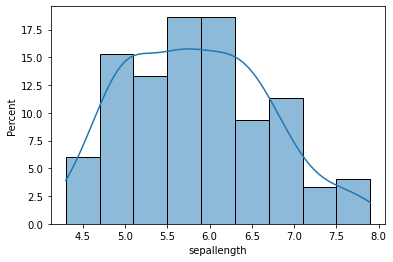

In [17]:
# Histogram with KDE (kernel density estimation)
# Relative frequency rather than frequency
fig,ax = plt.subplots(1,1,figsize=(6,4))

sns.histplot(x='sepallength',data=df,ax=ax,kde=True,stat='percent');

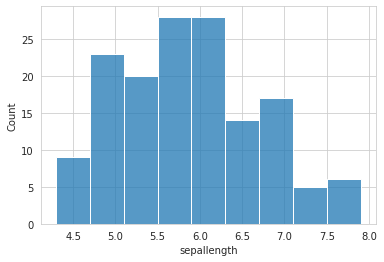

In [18]:
# Set a context for a single plot
with sns.axes_style('whitegrid'):
    sns.histplot(x=df.sepallength);

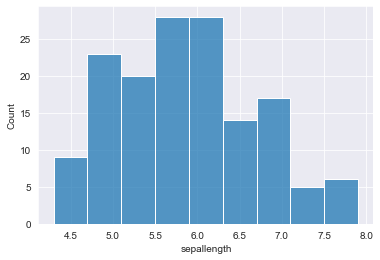

In [19]:
# Set style globally
sns.set_style('darkgrid')
sns.histplot(x=df.sepallength);

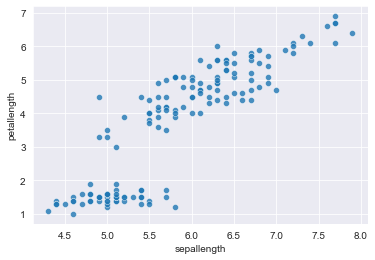

In [20]:
# Scatterplot
sns.scatterplot(x='sepallength',y='petallength',data=df,alpha=0.8);

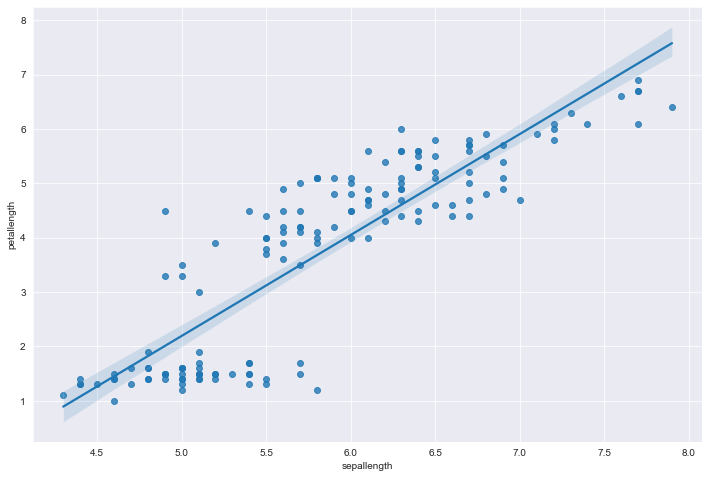

In [21]:
# Add a regression line
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x='sepallength',y='petallength',data=df,ax=ax);

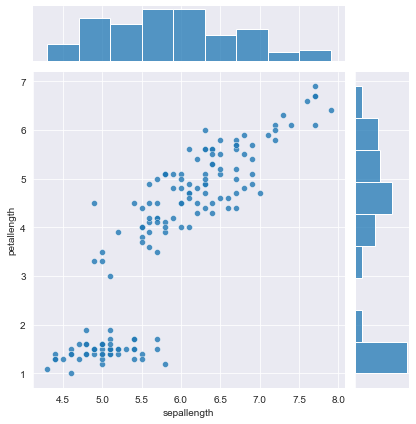

In [22]:
# Joint Plot
sns.jointplot(x='sepallength',y='petallength',data=df,alpha=0.8);

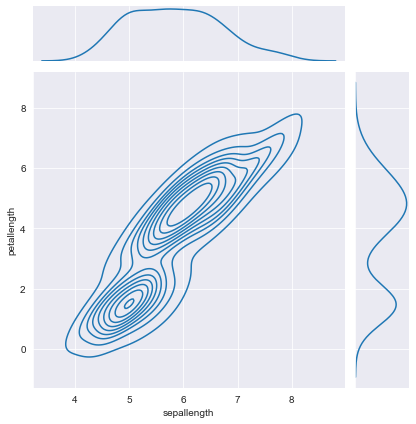

In [23]:
# Joint Plot with KDE (kernel density estimation)
sns.jointplot(x='sepallength',y='petallength',
              data=df,
              kind='kde');

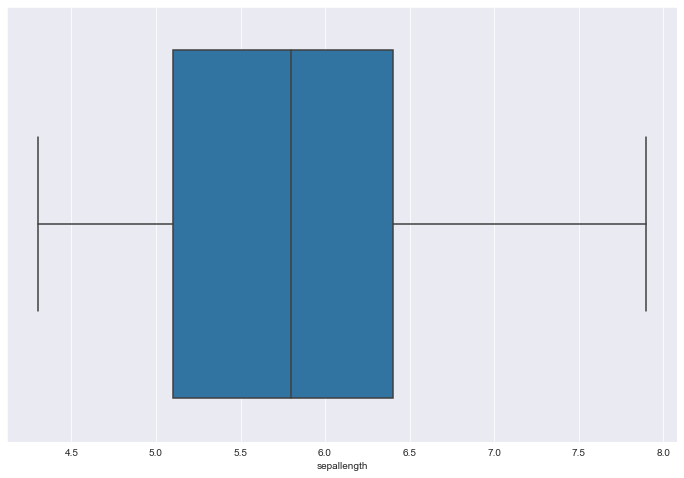

In [24]:
# Box plot
# The box plot can visualize median, inter-quartile range, and outliers
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.boxplot(x=df.sepallength,ax=ax);

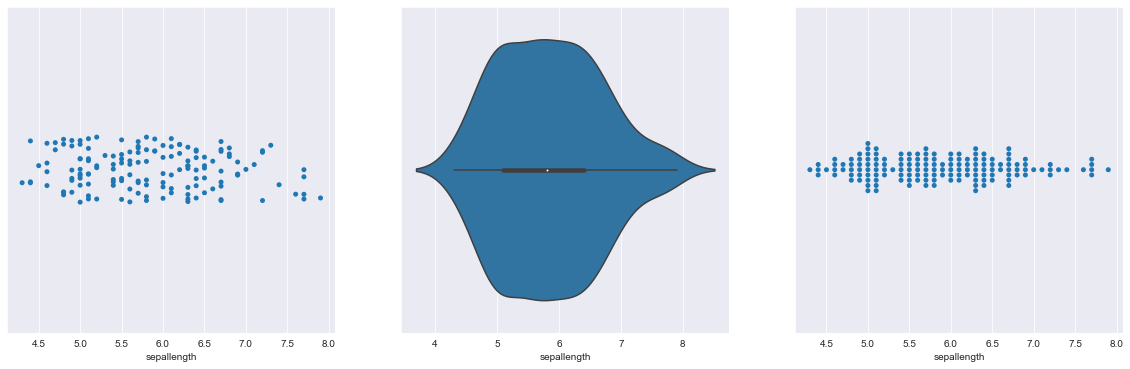

In [25]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.stripplot(x='sepallength',data=df,ax=ax[0])
sns.violinplot(x='sepallength',data=df,ax=ax[1])
sns.swarmplot(x='sepallength',data=df,ax=ax[2]);

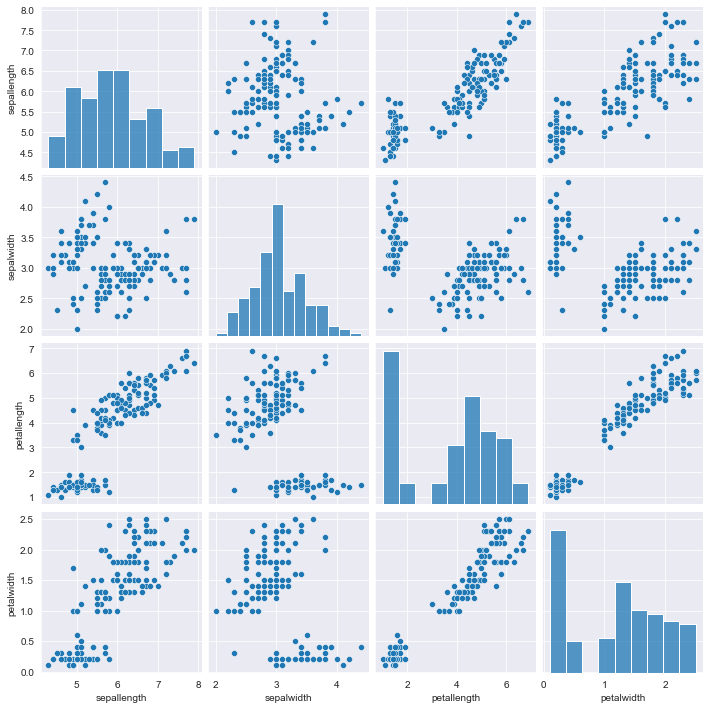

In [26]:
# Pair plot
sns.pairplot(df[['sepallength','sepalwidth','petallength','petalwidth']]);

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


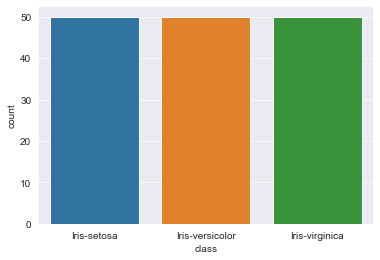

In [27]:
# Frequency plot for categorical variables
print(df["class"].value_counts())
sns.countplot(x=df["class"]);

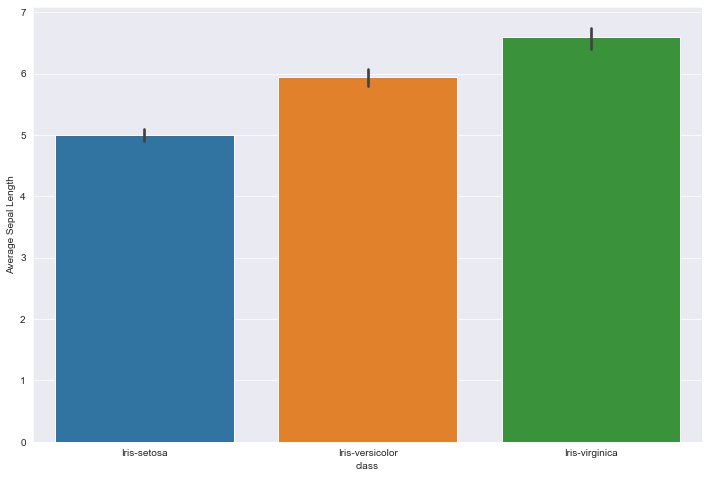

In [28]:
# Bar plot of the Sepal Length mean in each class
# The black vertical line shows a 95% confidence interval for the mean
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.barplot(x=df["class"],y='sepallength',data=df,estimator=np.mean,ci=95);
ax.set_ylabel('Average Sepal Length');

## 2.2 Multiple Plots sharing Axis

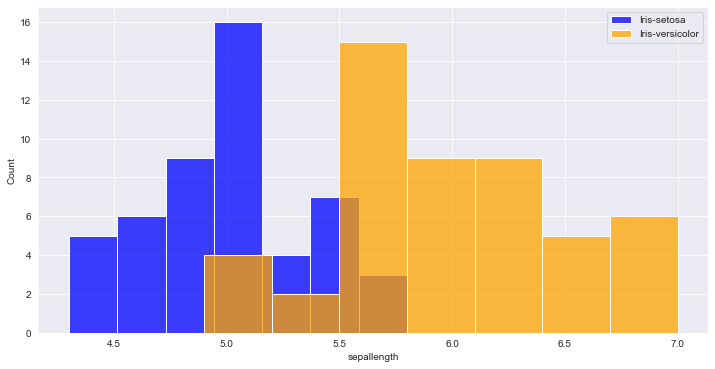

In [29]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.histplot(x=df[df['class']=='Iris-setosa']['sepallength'], \
             label='Iris-setosa',color='blue',ax=ax);
sns.histplot(x=df[df['class']=='Iris-versicolor']['sepallength'], \
             label='Iris-versicolor',color='orange',ax=ax);
plt.legend(loc='best');

## 2.3 Subplots

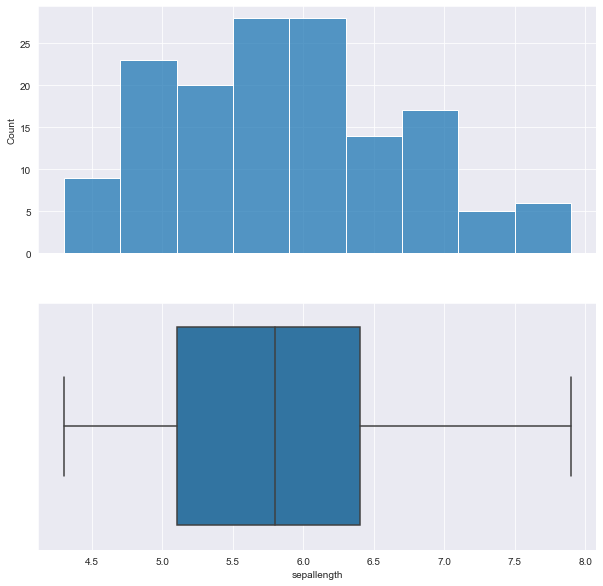

In [30]:
fig,ax = plt.subplots(2,1,figsize=(10,10), sharex=True)

sns.histplot(x=df.sepallength, ax=ax[0]);
sns.boxplot(x=df.sepallength, ax=ax[1]);